In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Linear Regression/train.csv')

In [3]:
data.head()

x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984

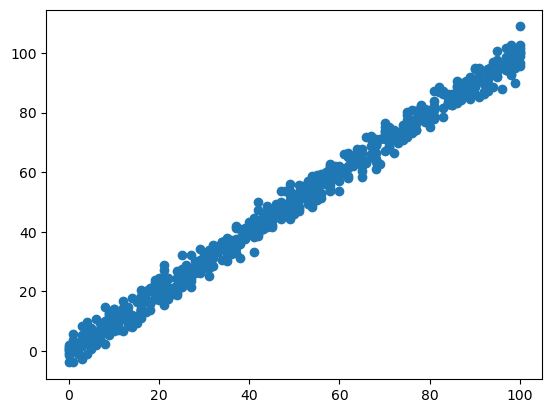

In [4]:
plt.scatter(data.x, data.y)

In [5]:
print(data.x[2])
print(data.iloc[2].x)
print(data.x.iloc[2])

15.0
15.0
15.0


In [6]:
data.shape

(700, 2)

In [7]:
data.describe()

x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [9]:
data.isna().value_counts()

x      y    
False  False    699
       True       1
Name: count, dtype: int64

# Handling Missing Vallue

In [10]:
clean_data = data.copy()
clean_data.y.fillna(clean_data.y.mean(), inplace=True)

In [11]:
clean_data.isna().value_counts()

x      y    
False  False    700
Name: count, dtype: int64

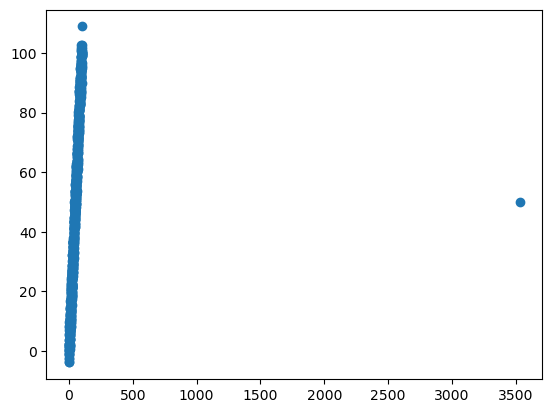

In [12]:
plt.scatter(clean_data.x, clean_data.y)

([<matplotlib.axis.XTick at 0x1ca773162d0>,
 [Text(1, 0, 'x'), Text(2, 0, 'y')])

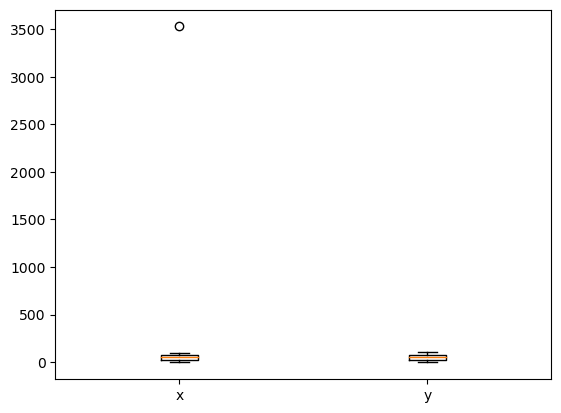

In [13]:
plt.boxplot(clean_data);
plt.xticks([1, 2], ['x', 'y'])

# Outlier Handling

In [14]:
# x_isna_index = data.index[data.x.isna()==True].tolist()
# y_isna_index = data.index[data.y.isna()==True].tolist()
# print(x_isna_index)
# print(y_isna_index)

In [15]:
index_max = data.x.idxmax()
print(index_max)

213


In [16]:
clean_data.drop(index_max, inplace=True)

([<matplotlib.axis.XTick at 0x1ca773bcc10>,
 [Text(1, 0, 'x'), Text(2, 0, 'y')])

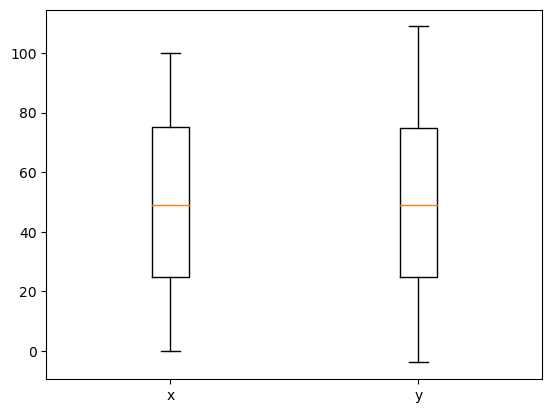

In [26]:
plt.boxplot(clean_data);
plt.xticks([1, 2], ['x', 'y'])

In [18]:
# m = slope, b = intercept, n_data = jumlah data
def Loss_function(m, b, i_data):
    total_error = 0
    n_data = len(i_data)
    for i in range(len(i_data)):
        x = clean_data.x.iloc[i]
        y_seharusnya = clean_data.y.iloc[i]
        y_pred = m*x + b
        total_error += (y_seharusnya-y_pred)**2
    total_error = total_error/float(n_data)

In [19]:
# m = slope, b = intercept, n_data = jumlah data
def Gradient_descent(m, b, data, l_r): #MSE
    n_data = float(len(data))
    m_g=0
    b_g=0
    for i in range(len(data)):
        x= data.x.iloc[i]
        y_seharusnya= data.y.iloc[i]
        
        m_g += -(2/n_data) * x * (y_seharusnya-(m*x+b)) #partial derivative m
        b_g += -(2/n_data) * (y_seharusnya-(m*x+b)) #partial derivative b
        print(f'm_g{i} : {m_g}')
        print(f'b_g{i} : {b_g}')
    
    m = m-m_g * l_r
    b = b-b_g * l_r
    print(f'm{i} : {m}')
    print(f'b{i} : {b}')
    return m, b

In [20]:
# m = slope, b = intercept, n_data = jumlah data
def Gradient_descent2(m, b, data, l_r): #MSE
    n_data = float(len(data))
    print(f'n_data : {n_data}')

    x= data.x
    y_seharusnya= data.y
    
    D_m = (-2/n_data) * sum(x * (y_seharusnya-(m*x+b))) #partial derivative m
    D_b = (-2/n_data) * sum((y_seharusnya-(m*x+b))) #partial derivative b
    print(f'D_m : {D_m}')
    print(f'D_b : {D_b}')
    m = m-D_m * l_r
    b = b-D_b * l_r
    print(f'm : {m}')
    print(f'b : {b}')
        
    return m, b

In [29]:
m = 0
b = 0
l_r = 0.0001

epochs = 100

for i in range(epochs):
    print(f'epochs: {epochs}')
    m, b = Gradient_descent(m, b, clean_data, l_r)
print(f'm,b : {m, b}')

epochs: 100
m_g0 : -1.4797906925321889
b_g0 : -0.06165794552217453
m_g1 : -8.27012875404864
b_g1 : -0.19746470675250355
m_g2 : -9.009126880228898
b_g2 : -0.24673124849785405
m_g3 : -12.987047123834047
b_g3 : -0.3514133601716738
m_g4 : -34.715635388297564
b_g4 : -0.6011672482689556
m_g5 : -38.059553836022886
b_g5 : -0.6940538718168813
m_g6 : -38.42971338383404
b_g6 : -0.7249005008011445
m_g7 : -57.14741091344777
b_g7 : -0.9559831863519314
m_g8 : -58.90793676967095
b_g8 : -1.0264042206008583
m_g9 : -59.00755506825464
b_g9 : -1.0463278803175966
m_g10 : -59.522007640729605
b_g10 : -1.078481166097282
m_g11 : -60.14153963775392
b_g11 : -1.117201915911302
m_g12 : -61.83103244393418
b_g12 : -1.1875974495021462
m_g13 : -66.22765473474963
b_g13 : -1.30033135439485
m_g14 : -73.71156624410585
b_g14 : -1.4389223082718172
m_g15 : -84.30366979603718
b_g15 : -1.6154573674706727
m_g16 : -86.3069213802432
b_g16 : -1.69250550532475
m_g17 : -101.01244355907009
b_g17 : -1.8939510146237486
m_g18 : -103.4470

m_g591 : -1845.873349829519
b_g591 : -27.836925332933383
m_g592 : -1848.8535103696097
b_g592 : -27.892113491083215
m_g593 : -1850.5690198017126
b_g593 : -27.936100912419185
m_g594 : -1859.1289705580546
b_g594 : -28.030166305346018
m_g595 : -1859.157174946934
b_g595 : -28.039567768305833
m_g596 : -1859.5555315639133
b_g596 : -28.057674887259438
m_g597 : -1859.5608128322588
b_g597 : -28.060315521432138
m_g598 : -1859.552423600158
b_g598 : -28.05612090538166
m_g599 : -1863.8532019777906
b_g599 : -28.12228672657601
m_g600 : -1869.2291634814135
b_g600 : -28.19800449423267
m_g601 : -1870.9204421092843
b_g601 : -28.238273032991497
m_g602 : -1876.714037503484
b_g602 : -28.31450455133623
m_g603 : -1878.2307721837133
b_g603 : -28.34977745087645
m_g604 : -1878.4460828655087
b_g604 : -28.376691286100872
m_g605 : -1884.8198515286
b_g605 : -28.450804875206586
m_g606 : -1892.757479533671
b_g606 : -28.542041978713147
m_g607 : -1892.759842872396
b_g607 : -28.542829758288125
m_g608 : -1895.5666279634218

In [30]:
s, c =0, 0
l_r = 0.0001

epochs = 100

for i in range(epochs):
    print(f'epochs: {i}')
    s, c = Gradient_descent2(s, c, clean_data, l_r)
print(f's2,c2 : {s, c}')
    

epochs: 0
n_data : 699.0
D_m : -6670.849169037078
D_b : -99.87973834091552
m : 0.6670849169037079
b : 0.009987973834091553
epochs: 1
n_data : 699.0
D_m : -2215.5933508823227
D_b : -33.13218386691374
m : 0.8886442519919402
b : 0.013301192220782928
epochs: 2
n_data : 699.0
D_m : -735.8668294989048
D_b : -10.96328459842473
m : 0.9622309349418307
b : 0.014397520680625402
epochs: 3
n_data : 699.0
D_m : -244.4044606592587
D_b : -3.6003181620252973
m : 0.9866713810077565
b : 0.014757552496827931
epochs: 4
n_data : 699.0
D_m : -81.17479860654231
D_b : -1.1548541943449158
m : 0.9947888608684108
b : 0.014873037916262422
epochs: 5
n_data : 699.0
D_m : -26.961242751106173
D_b : -0.34264297764489876
m : 0.9974849851435214
b : 0.014907302214026912
epochs: 6
n_data : 699.0
D_m : -8.955265131106392
D_b : -0.0728848792128422
m : 0.998380511656632
b : 0.014914590701948196
epochs: 7
n_data : 699.0
D_m : -2.9749300276620825
D_b : 0.016707972150263237
m : 0.9986780046593982
b : 0.014912919904733169
epochs:

D_m : -0.0009167829532575407
D_b : 0.061193287190591465
m : 0.9988280116300291
b : 0.014774313447384535
epochs: 31
n_data : 699.0
D_m : -0.0009167369671958132
D_b : 0.06119021898580787
m : 0.9988281033037258
b : 0.014768194425485954
epochs: 32
n_data : 699.0
D_m : -0.0009166909959936383
D_b : 0.06118715093467741
m : 0.9988281949728255
b : 0.014762075710392486
epochs: 33
n_data : 699.0
D_m : -0.000916645030738879
D_b : 0.06118408303732237
m : 0.9988282866373286
b : 0.014755957302088753
epochs: 34
n_data : 699.0
D_m : -0.0009165990703597236
D_b : 0.06118101529375128
m : 0.9988283782972356
b : 0.014749839200559379
epochs: 35
n_data : 699.0
D_m : -0.0009165531119776509
D_b : 0.06117794770400009
m : 0.9988284699525468
b : 0.014743721405788978
epochs: 36
n_data : 699.0
D_m : -0.0009165071562404641
D_b : 0.06117488026805054
m : 0.9988285616032624
b : 0.014737603917762174
epochs: 37
n_data : 699.0
D_m : -0.0009164612034661287
D_b : 0.061171812985891784
m : 0.9988286532493827
b : 0.014731486736

In [31]:
print(f'm : {m}') # slope / kemiringan
print(f'b : {b}') # intercept / y jika x = 0

m : 0.9988343263437605
b : 0.014352819895884933


In [40]:
def Lin_Reg(x) : return m * x + b

In [41]:
Model_lin_reg = list(map(Lin_Reg, clean_data.x))

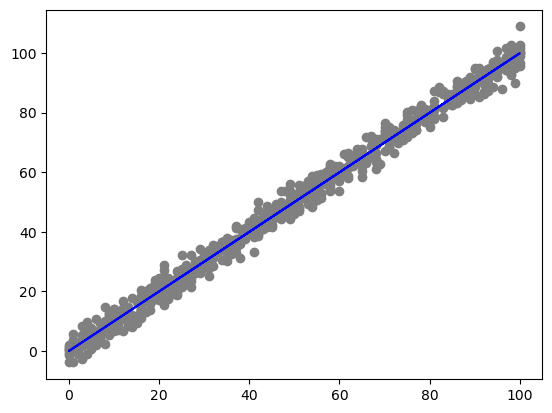

In [42]:
plt.scatter(clean_data.x, clean_data.y, color='grey' );
plt.plot(clean_data.x, Model_lin_reg, color= 'blue');

In [43]:
from scipy import stats

In [47]:
slope, intercept, r, p, std_err = stats.linregress(clean_data.x, clean_data.y)

In [48]:
print(f'slope : {slope}')
print(f'intercept : {intercept}')

slope : 1.000656381856304
intercept : -0.10726546430097272


In [50]:
model_scipy_linregress= list(map(Lin_Reg, clean_data.x))

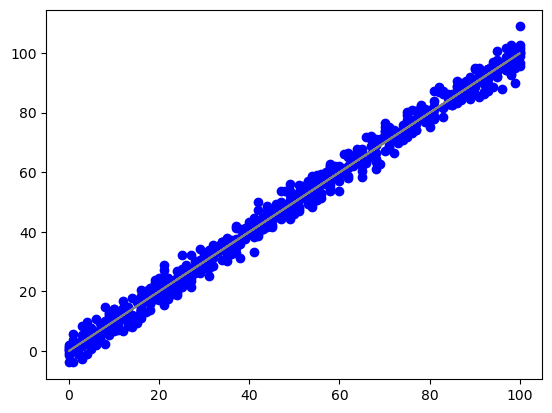

In [51]:
plt.scatter(clean_data.x, clean_data.y, color='blue' );
plt.plot(clean_data.x, model_scipy_linregress, color= 'grey');